In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from itertools import combinations
from collections import Counter

In [4]:
df = pd.read_csv('IMDB-Movie-Data.csv')

In [5]:
df.shape

(1000, 12)

In [6]:
df.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [7]:
df.tail()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
995,996,Secret in Their Eyes,"Crime,Drama,Mystery","A tight-knit team of rising investigators, alo...",Billy Ray,"Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...",2015,111,6.2,27585,NaN,45.0
996,997,Hostel: Part II,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17.54,46.0
997,998,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58.01,50.0
998,999,Search Party,"Adventure,Comedy",A pair of friends embark on a mission to reuni...,Scot Armstrong,"Adam Pally, T.J. Miller, Thomas Middleditch,Sh...",2014,93,5.6,4881,NaN,22.0
999,1000,Nine Lives,"Comedy,Family,Fantasy",A stuffy businessman finds himself trapped ins...,Barry Sonnenfeld,"Kevin Spacey, Jennifer Garner, Robbie Amell,Ch...",2016,87,5.3,12435,19.64,11.0


In [8]:
df.describe()

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,872.000000,936.000000
mean,500.500000,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,288.819436,3.205962,18.810908,0.945429,1.887626e+05,103.253540,17.194757
min,1.000000,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,250.750000,2010.000000,100.000000,6.200000,3.630900e+04,13.270000,47.000000
50%,500.500000,2014.000000,111.000000,6.800000,1.107990e+05,47.985000,59.500000
75%,750.250000,2016.000000,123.000000,7.400000,2.399098e+05,113.715000,72.000000
max,1000.000000,2016.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000


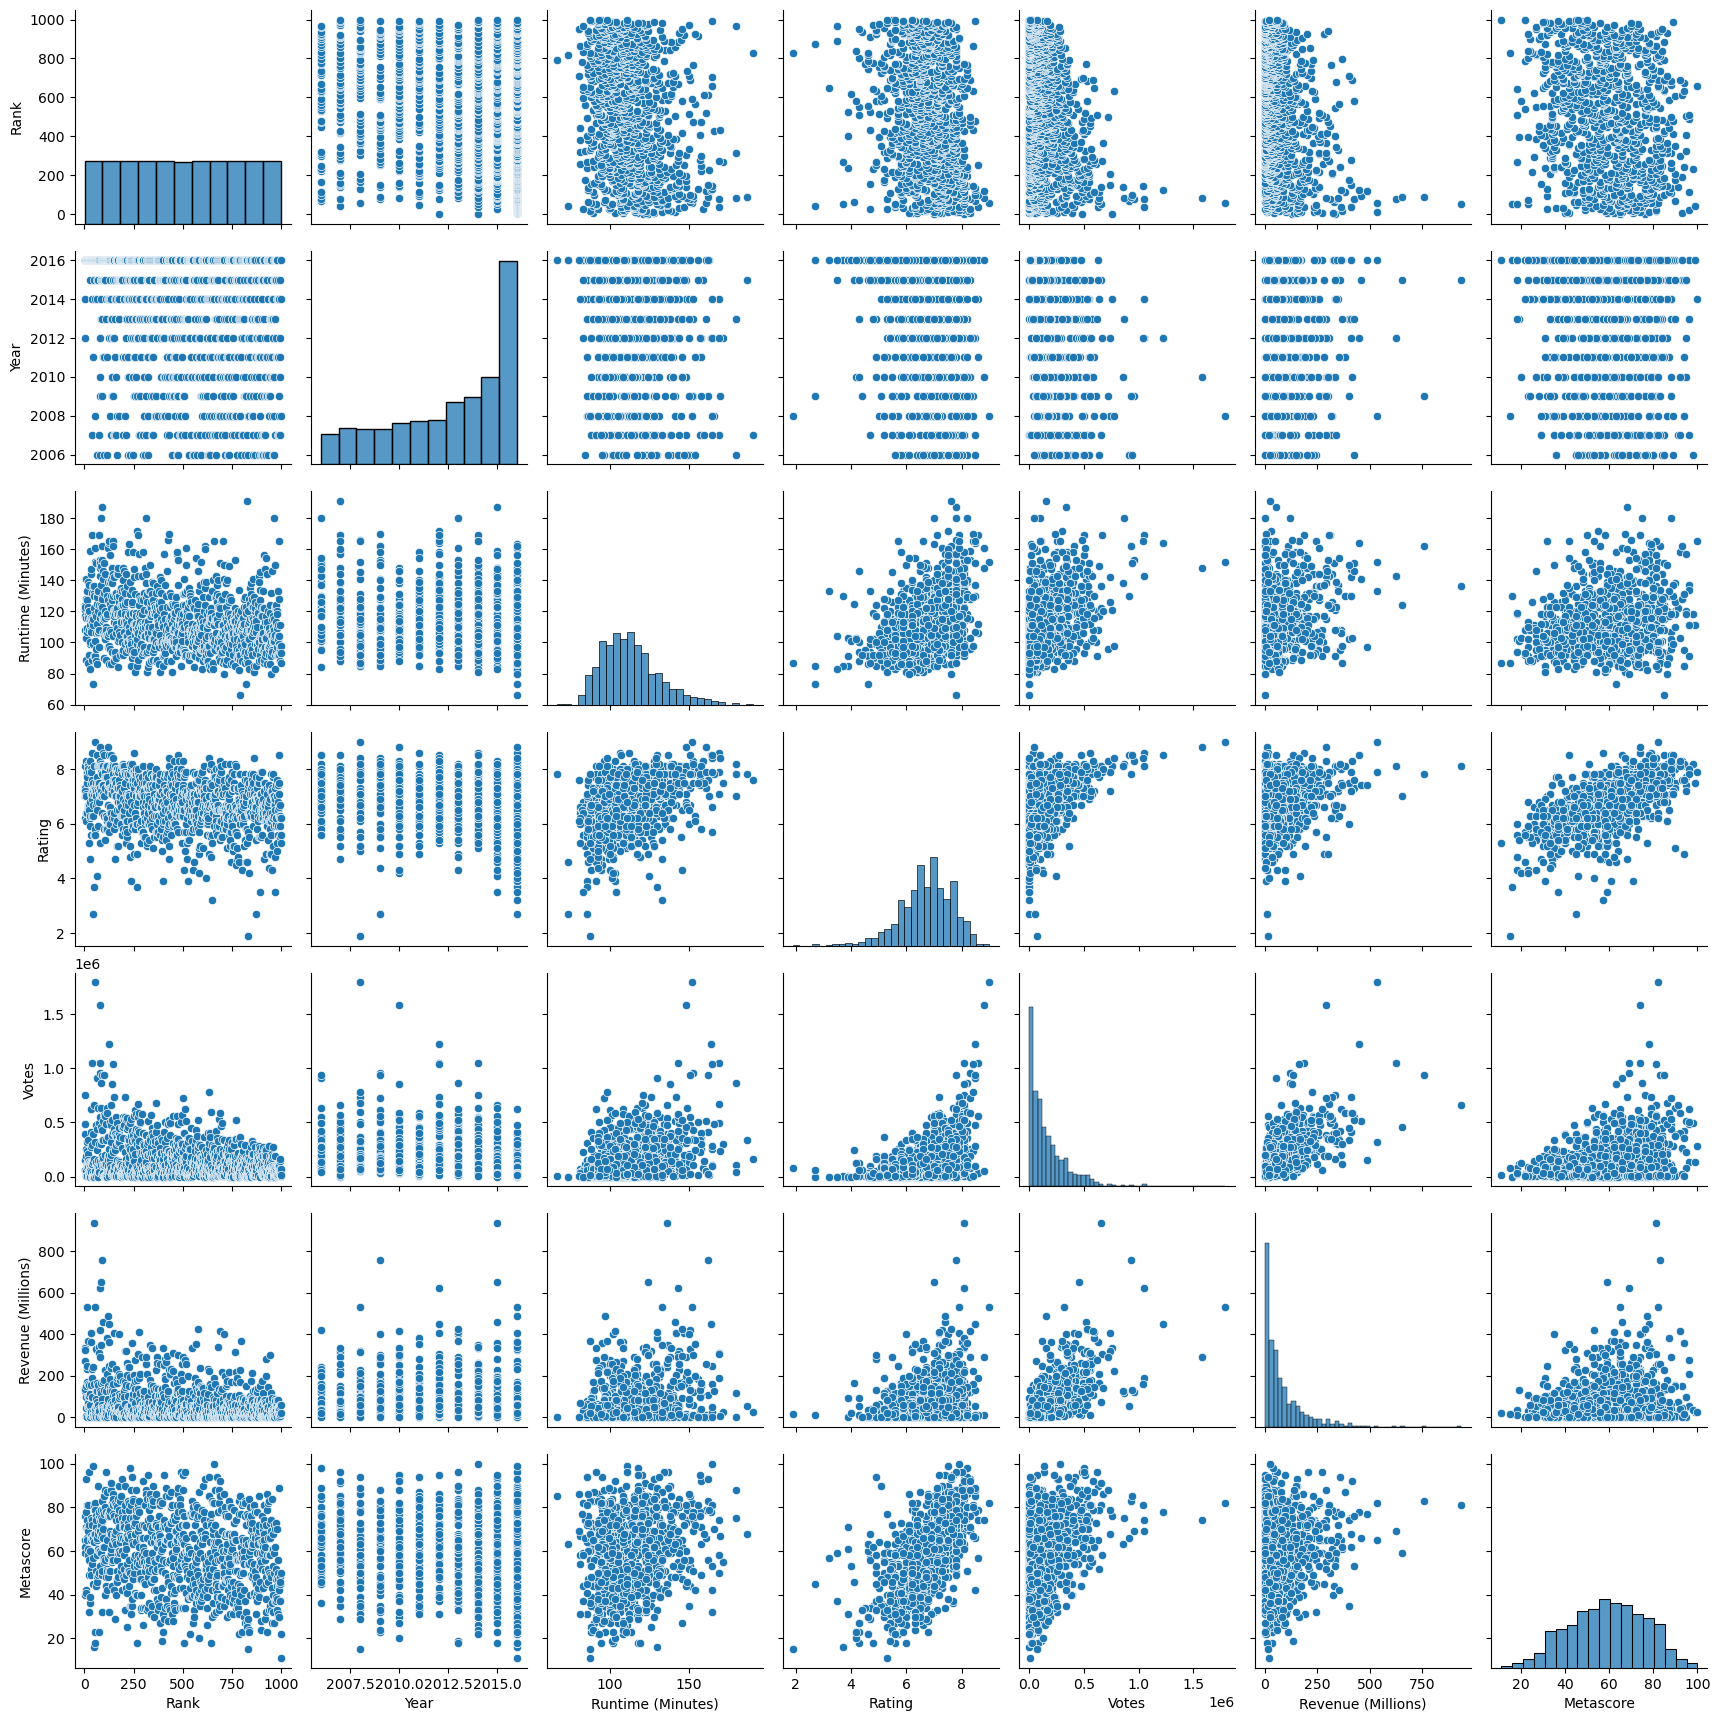

In [10]:
sns.pairplot(df)
plt.show()

In [11]:
df.info

<bound method DataFrame.info of      Rank                    Title                     Genre  \
0       1  Guardians of the Galaxy   Action,Adventure,Sci-Fi   
1       2               Prometheus  Adventure,Mystery,Sci-Fi   
2       3                    Split           Horror,Thriller   
3       4                     Sing   Animation,Comedy,Family   
4       5            Suicide Squad  Action,Adventure,Fantasy   
..    ...                      ...                       ...   
995   996     Secret in Their Eyes       Crime,Drama,Mystery   
996   997          Hostel: Part II                    Horror   
997   998   Step Up 2: The Streets       Drama,Music,Romance   
998   999             Search Party          Adventure,Comedy   
999  1000               Nine Lives     Comedy,Family,Fantasy   

                                           Description              Director  \
0    A group of intergalactic criminals are forced ...            James Gunn   
1    Following clues to the origin of m

In [32]:
all_titles = ''.join(df['Title'])
words = re.findall(r'\w+',all_titles.lower())
word_counts=Counter(words)
common_words=word_counts.most_common(10)
print(common_words)

[('the', 104), ('of', 92), ('s', 30), ('and', 22), ('a', 17), ('in', 15), ('to', 11), ('man', 8), ('for', 8), ('with', 8)]


In [20]:
words_count = df['Title'].str.split().str.len()
avg=words_count.mean()
print(f'Average number of words in movie titles: {avg}')
char_counts=df['Title'].str.len()
avg_char=char_counts.mean()
print(f'Average number of characters in movie titles:{avg_char}')

Average number of words in movie titles: 2.605
Average number of characters in movie titles:14.539


In [21]:
dup = df['Title'][df.duplicated(subset='Title',keep=False)].unique()
if len(dup)>0:
    print('Duplicate titles found :')
    for title in dup:
        print(title)
else:
    print('No duplicate title found')

Duplicate titles found :
The Host


In [25]:
genre_series = df['Genre'].str.split(',')
all_genres = [genre.strip() for sublist in genre_series for genre in sublist]
genre_counts=Counter(all_genres)
print('Genre counts:')
for genre, count in genre_counts.items():
    print(f'{genre}:{count}')

Genre counts:
Action:303
Adventure:259
Sci-Fi:120
Mystery:106
Horror:119
Thriller:195
Animation:49
Comedy:279
Family:51
Fantasy:101
Drama:513
Music:16
Biography:81
Romance:141
History:29
Crime:150
Western:7
War:13
Musical:5
Sport:18


In [26]:
df['Genre_Combination']=genre_series.apply(lambda x: tuple(sorted([genre.strip() for genre in x])))
combination_counts = df['Genre_Combination'].value_counts()
print('Genre COmbination')
print(combination_counts)

Genre COmbination
(Action, Adventure, Sci-Fi)    50
(Drama,)                       48
(Comedy, Drama, Romance)       35
(Comedy,)                      32
(Drama, Romance)               31
                               ..
(Action, Comedy, Family)        1
(Action, Crime, Fantasy)        1
(Comedy, Mystery)               1
(Adventure, Comedy, Horror)     1
(Comedy, Family, Fantasy)       1
Name: Genre_Combination, Length: 207, dtype: int64


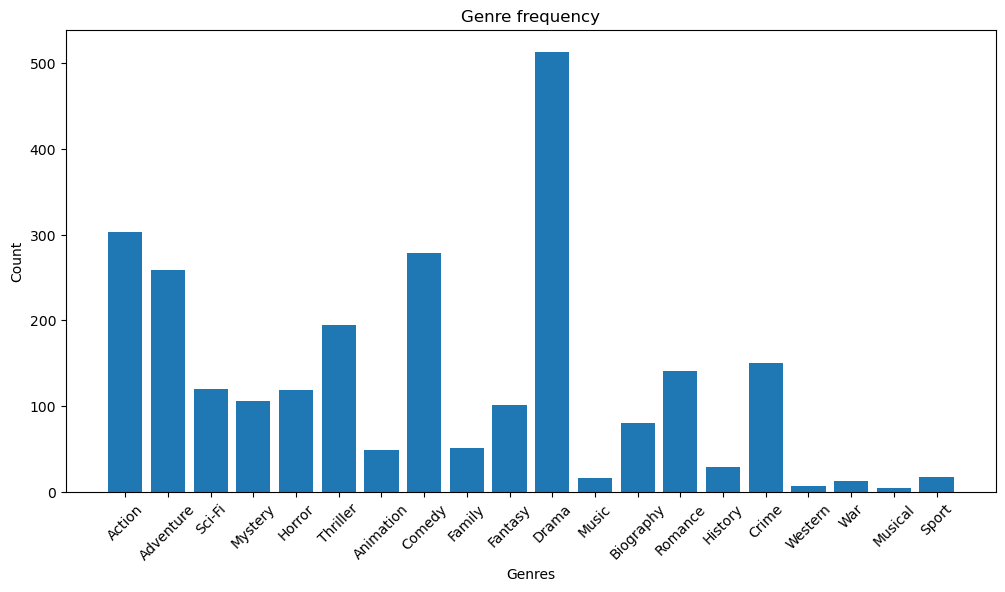

In [27]:
plt.figure(figsize=(12,6))
plt.bar(genre_counts.keys(), genre_counts.values())
plt.title('Genre frequency')
plt.xlabel('Genres')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [28]:
df['Description_word_count']=df['Description'].str.split().str.len()
print(df[['Description', 'Description_word_count']].head())

                                         Description  Description_word_count
0  A group of intergalactic criminals are forced ...                      21
1  Following clues to the origin of mankind, a te...                      24
2  Three girls are kidnapped by a man with a diag...                      27
3  In a city of humanoid animals, a hustling thea...                      37
4  A secret government agency recruits some of th...                      27


In [31]:
all_description=''.join(df['Description'].dropna()).lower()
word = re.findall(r'\b\w+\b',all_description)
wc = Counter(word)
print('Most common word in description')
for w, c in wc.most_common(10):
    print(f'{w}: {c}')

Most common word in description
a: 1640
the: 1364
to: 938
of: 814
and: 721
in: 580
his: 487
an: 304
is: 296
with: 274


In [33]:
missing_descp=df['Description'].isnull().sum()
if missing_descp > 0:
    print(f'there are {missing_descp} missing description')
else:
    print("there is no missing description")

there is no missing description


In [34]:
keywords = ['group', 'origin', 'invade', 'home']
keyword_count = {keyword: 0 for keyword in keywords}
for description in df['Description'].dropna():
    for keyword in keywords:
        keyword_count[keyword]+=description.lower().count(keyword)
print('keyword counts')
for keyword, count in keyword_count.items():
    print(f'{keyword}: {count}')

keyword counts
group: 48
origin: 7
invade: 5
home: 55


In [35]:
director_count = df['Director'].value_counts()
print('Number of movie directed by each director')
print(director_count)

Number of movie directed by each director
Ridley Scott          8
David Yates           6
M. Night Shyamalan    6
Paul W.S. Anderson    6
Michael Bay           6
                     ..
Lee Toland Krieger    1
Gillies MacKinnon     1
Peter Atencio         1
James Mangold         1
Scot Armstrong        1
Name: Director, Length: 644, dtype: int64


In [37]:
df['Genres']=df['Genre'].str.split(',')
df_exploded=df.explode('Genres')
genre_count = df_exploded.groupby(['Director', 'Genres']).size().unstack(fill_value=0)
print('Number of movies directed per genre for each director:')
print(genre_count)
if 'Rating' in df.columns:
    average_rating = df.groupby('Director')['Rating'].mean()
    print('Average rating per director')
    print(average_rating)

Number of movies directed per genre for each director:
Genres               Action  Adventure  Animation  Biography  Comedy  Crime  \
Director                                                                      
Aamir Khan                0          0          0          0       0      0   
Abdellatif Kechiche       0          0          0          0       0      0   
Adam Leon                 0          0          0          0       1      0   
Adam McKay                2          0          0          1       4      1   
Adam Shankman             0          0          0          0       2      0   
...                     ...        ...        ...        ...     ...    ...   
Xavier Dolan              0          0          0          0       0      0   
Yimou Zhang               1          1          0          0       0      0   
Yorgos Lanthimos          0          0          0          0       1      0   
Zack Snyder               5          2          0          0       0      0 

In [38]:
multiple_entries = df.groupby(['Director', 'Year']).size().reset_index(name='Movie_Count')
directors_multiple=multiple_entries[multiple_entries['Movie_Count']>1]
print('DIrectors with multiple entries')
print(directors_multiple)

DIrectors with multiple entries
                Director  Year  Movie_Count
159       Clint Eastwood  2008            2
231          David Yates  2016            2
236     Denis Villeneuve  2013            2
367          Henry Joost  2016            2
430         Jeff Nichols  2016            2
555       Lars von Trier  2013            2
664        Mike Flanagan  2016            3
689     Nicholas Stoller  2016            2
745           Peter Berg  2016            2
756            Phil Lord  2014            2
779  Richard LaGravenese  2007            2
802     Robert Rodriguez  2007            2


In [42]:
actors_list = df['Actors'].str.split(',').explode()
actors_list=actors_list.str.strip()
actor_counts = Counter(actors_list)
print('Actor counts')
print(actor_counts.most_common(10))

Actor counts
[('Mark Wahlberg', 15), ('Hugh Jackman', 14), ('Christian Bale', 13), ('Brad Pitt', 13), ('Michael Fassbender', 12), ('Scarlett Johansson', 12), ('Anne Hathaway', 12), ('Robert Downey Jr.', 12), ('Johnny Depp', 12), ('Tom Hardy', 12)]


In [44]:
co_occur=Counter()
for actors in df['Actors']:
    actors=[actor.strip() for actor in actors.split(',')]
    for actor1, actor2 in combinations(actors, 2):
        co_occur[(actor1, actor2)]+=1
        co_occur[(actor2, actor1)]+=1

co_occur_df = pd.DataFrame(co_occur.items(), columns = ['Actor Pair', 'Coocur'])
co_occur_df.sort_values(by='Coocur', ascending = False, inplace=True)
print('Common actor pair')
print(co_occur_df.head(10))


Common actor pair
                               Actor Pair  Coocur
1350     (Daniel Radcliffe, Rupert Grint)       4
4490          (Adam Sandler, Kevin James)       4
3595  (Helena Bonham Carter, Johnny Depp)       4
1354          (Emma Watson, Rupert Grint)       4
1351     (Rupert Grint, Daniel Radcliffe)       4
1791    (Liam Hemsworth, Josh Hutcherson)       4
1790    (Josh Hutcherson, Liam Hemsworth)       4
3594  (Johnny Depp, Helena Bonham Carter)       4
1349      (Emma Watson, Daniel Radcliffe)       4
1787  (Liam Hemsworth, Jennifer Lawrence)       4


In [45]:
actor_genre_count = df.explode('Actors')
actor_genre_count['Genres']=actor_genre_count['Genre'].str.split(',')
actor_genre_exploded=actor_genre_count.explode('Genres')
actor_genre_summ = actor_genre_exploded.groupby(['Actors', 'Genres']).size().unstack(fill_value=0)
print('Number of movies per genre for each actor')
print(actor_genre_summ)

Number of movies per genre for each actor
Genres                                              Action  Adventure  \
Actors                                                                  
Aamir Khan, Anushka Sharma, Sanjay Dutt,Boman I...       0          0   
Aamir Khan, Madhavan, Mona Singh, Sharman Joshi          0          0   
Aamir Khan, Sakshi Tanwar, Fatima Sana Shaikh,S...       1          0   
Aaron Paul, Dominic Cooper, Imogen Poots, Scott...       1          0   
Aaron Poole, Kenneth Welsh,Daniel Fathers, Kath...       0          0   
...                                                    ...        ...   
Zachary Gordon, Robert Capron, Rachael Harris,S...       0          0   
Zoey Deutch, James Franco, Tangie Ambrose,Cedri...       0          0   
Zoey Deutch, Lucy Fry, Danila Kozlovsky, Gabrie...       1          0   
Zoey Deutch, Nicholas Braun, Mateo Arias, Israe...       0          0   
Zooey Deschanel, Joseph Gordon-Levitt, Geoffrey...       0          0   

Genres  